In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [3]:
os.listdir('/Users/christophereppig/datasets')

['divvy_rides.csv', 'salary.csv']

In [4]:
divvy = pd.read_csv('/Users/christophereppig/datasets/divvy_rides.csv')

/Users/christophereppig/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
divvy.head()

,bikeid,birthday,birthyear,from_station_id,from_station_name,gender,starttime,stoptime,to_station_id,to_station_name,trip_id,tripduration,usertype
0,480,NaN,NaN,85,Michigan Ave & Oak St,NaN,2013-06-27 12:11,2013-06-27 12:16,28,Larrabee St & Menomonee St,4118,316,Customer
1,77,NaN,NaN,32,Racine Ave & Congress Pkwy,NaN,2013-06-27 14:44,2013-06-27 14:45,32,Racine Ave & Congress Pkwy,4275,64,Customer
2,77,NaN,NaN,32,Racine Ave & Congress Pkwy,NaN,2013-06-27 14:58,2013-06-27 15:05,19,Loomis St & Taylor St,4291,433,Customer
3,77,NaN,NaN,19,Loomis St & Taylor St,NaN,2013-06-27 15:06,2013-06-27 15:09,19,Loomis St & Taylor St,4316,123,Customer
4,77,NaN,NaN,19,Loomis St & Taylor St,NaN,2013-06-27 15:13,2013-06-27 15:27,55,Halsted St & James M Rochford St,4342,852,Customer


In [9]:
divvy['usertype'].value_counts()

Subscriber    5466758
Customer      2400700
Dependent         143
Name: usertype, dtype: int64

In [11]:
divvy['bikeid'].value_counts().head(25)

872     2820
478     2814
267     2757
94      2745
1329    2739
441     2728
417     2721
686     2714
225     2701
909     2698
1037    2686
721     2685
452     2684
30      2684
650     2677
1381    2675
414     2673
1226    2664
251     2662
571     2658
473     2654
371     2650
359     2649
1283    2645
1975    2645
Name: bikeid, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x116d3a050>],
 'caps': [<matplotlib.lines.Line2D at 0x116d3ae50>,
 'fliers': [<matplotlib.lines.Line2D at 0x116d51190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x116d46b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x116d10150>,
  <matplotlib.lines.Line2D at 0x116d3a810>]}

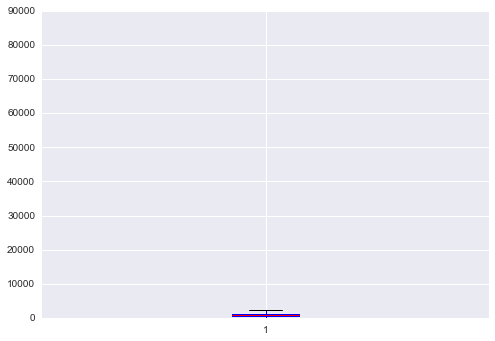

In [31]:
plt.boxplot(divvy['tripduration'])

In [12]:
divvy['from_station_name'].value_counts().head(20)

Streeter Dr & Illinois St       137683
Lake Shore Dr & Monroe St       124674
Clinton St & Washington Blvd    112140
Theater on the Lake             108426
Michigan Ave & Oak St           101762
Millennium Park                 100545
Lake Shore Dr & North Blvd       90112
Canal St & Adams St              88121
Canal St & Madison St            86289
Clinton St & Madison St          71598
Columbus Dr & Randolph St        70126
McClurg Ct & Illinois St         67656
Michigan Ave & Washington St     65991
Canal St & Jackson Blvd          64975
Michigan Ave & Lake St           63442
Dearborn St & Monroe St          61194
Franklin St & Jackson Blvd       60706
Museum Campus                    59772
LaSalle St & Jackson Blvd        58556
Wabash Ave & Grand Ave           58124
Name: from_station_name, dtype: int64

In [13]:
divvy['to_station_name'].value_counts().head(20)

Streeter Dr & Illinois St       164101
Lake Shore Dr & Monroe St       122493
Theater on the Lake             115330
Clinton St & Washington Blvd    110611
Millennium Park                 110085
Michigan Ave & Oak St           109586
Lake Shore Dr & North Blvd      101364
Canal St & Madison St            96899
Canal St & Adams St              85913
McClurg Ct & Illinois St         69345
Michigan Ave & Washington St     66940
Michigan Ave & Lake St           65580
Clinton St & Madison St          63789
Canal St & Jackson Blvd          62719
Museum Campus                    60718
Dearborn St & Monroe St          60350
Wabash Ave & Grand Ave           60333
Clark St & Elm St                57589
LaSalle St & Jackson Blvd        56869
Franklin St & Jackson Blvd       56046
Name: to_station_name, dtype: int64

In [20]:
departure_arrival = pd.DataFrame(divvy['to_station_name'].value_counts()).join(divvy['from_station_name'].value_counts())

In [23]:
departure_arrival['Difference'] = departure_arrival['to_station_name']-departure_arrival['from_station_name']
departure_arrival.head()

,to_station_name,from_station_name,Difference
Streeter Dr & Illinois St,164101,137683.0,26418.0
Lake Shore Dr & Monroe St,122493,124674.0,-2181.0
Theater on the Lake,115330,108426.0,6904.0
Clinton St & Washington Blvd,110611,112140.0,-1529.0
Millennium Park,110085,100545.0,9540.0


In [25]:
departure_arrival['Difference'].sort_values().head()

Columbus Dr & Randolph St      -22403.0
Canal St & Monroe St           -12298.0
Clinton St & Madison St         -7809.0
Stetson Ave & South Water St    -7677.0
Desplaines St & Kinzie St       -5314.0
Name: Difference, dtype: float64

In [29]:
departure_arrival['from_station_name'].describe()
departure_arrival.dropna(inplace=True)

(array([ 387.,  101.,   47.,   22.,   11.,    2.,    3.,    3.,    1.,    2.]),
 array([  1.00000000e+00,   1.37692000e+04,   2.75374000e+04,
          4.13056000e+04,   5.50738000e+04,   6.88420000e+04,
          8.26102000e+04,   9.63784000e+04,   1.10146600e+05,
          1.23914800e+05,   1.37683000e+05]),
 <a list of 10 Patch objects>)

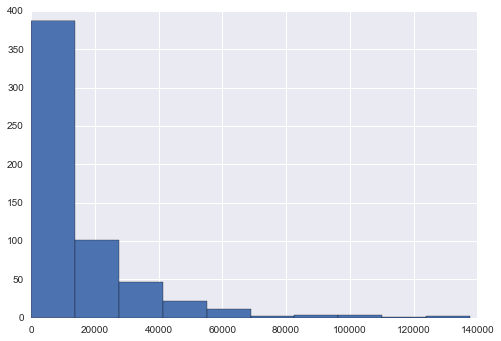

In [30]:
plt.hist(departure_arrival['from_station_name'])

(array([ 156.,   53.,   32.,   26.,   26.,   14.,   22.,   28.,   19.,
          11.,   20.,   12.,    9.,    7.,   14.,    7.,    9.,    9.,
           3.,   11.,    8.,    1.,    6.,   10.,    8.,    3.,    3.,
           4.,    3.,    1.,    2.,    4.,    3.,    2.,    2.,    4.,
           1.,    2.,    0.,    2.,    1.,    1.,    2.,    1.,    2.,
           0.,    1.,    2.,    0.,    1.,    1.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    1.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   1.37782000e+03,   2.75464000e+03,
          4.13146000e+03,   5.50828000e+03,   6.88510000e+03,
          8.26192000e+03,   9.63874000e+03,   1.10155600e+04,
          1.23923800e+04

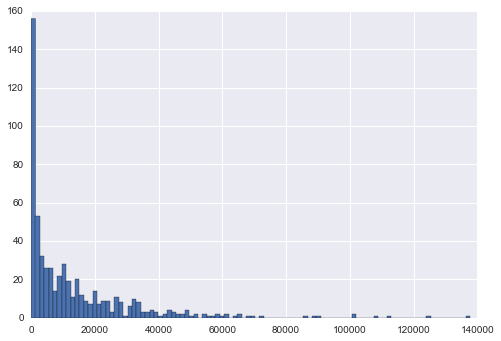

In [32]:
plt.hist(departure_arrival['from_station_name'], bins=100)

In [33]:
departure_arrival.sort_values(by='from_station_name').head()

,to_station_name,from_station_name,Difference
Central St Metra,1,1.0,0.0
Ashland Ave & 69th St,3,1.0,2.0
Throop St & 52nd St,1,1.0,0.0
Racine Ave & Garfield Blvd,1,1.0,0.0
State St & 76th St,1,1.0,0.0


In [34]:
departure_arrival.sort_values(by='to_station_name').head()

,to_station_name,from_station_name,Difference
Central St Metra,1,1.0,0.0
Throop St & 52nd St,1,1.0,0.0
Racine Ave & Garfield Blvd,1,1.0,0.0
State St & 76th St,1,1.0,0.0
Lombard Ave & Madison St,1,2.0,-1.0


(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    1.,    0.,    0.,    0.,    0.,    1.,
           3.,    2.,    3.,    1.,    6.,   12.,   10.,   14.,   52.,
         253.,  135.,   29.,   24.,    7.,    8.,    3.,    1.,    1.,
           2.,    1.,    0.,    1.,    0.,    0.,    1.,    1.,    0.,
           0.,    0.,    1.,    0.,    1.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([-22403.  , -21914.79, -21426.58, -20938.37, -20450.16, -19961.95,
        -19473.74, -18985.53, -18497.32, -18009.11, -17520.9 , -17032.69,
        -16544.48, -16056.27, -15568.06, -15079.85, -14591.64,

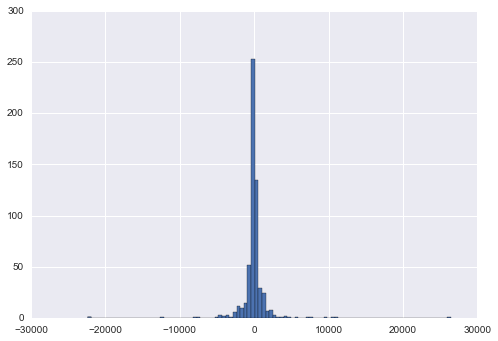

In [35]:
plt.hist(departure_arrival['Difference'], bins=100)

In [36]:
departure_arrival['Difference'].describe()

count      579.000000
mean         0.005181
std       2086.448033
min     -22403.000000
25%       -225.500000
50%          0.000000
75%        217.500000
max      26418.000000
Name: Difference, dtype: float64

In [37]:
divvy['tripduration'].describe()

count    7.867601e+06
mean     1.035279e+03
std      2.063022e+03
min      6.000000e+01
25%      4.220000e+02
50%      7.300000e+02
75%      1.216000e+03
max      8.639900e+04
Name: tripduration, dtype: float64

In [38]:
divvy['tripduration'].isnull().sum()

0

In [39]:
divvy['tripduration'].isnull().any()

False

(0, 1800)

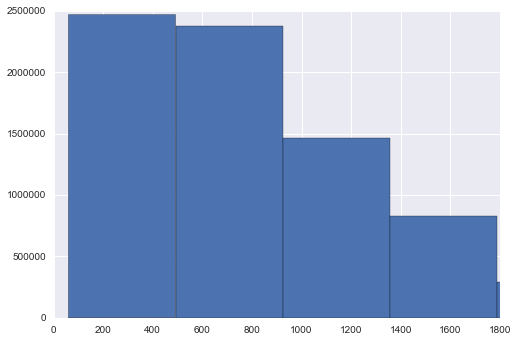

In [49]:
plt.hist(divvy['tripduration'], bins=200)
plt.xlim(0, 1800)

In [51]:
divvy[(divvy['tripduration'] <= 1800.0)]['tripduration']

0           316
1            64
2           433
3           123
4           852
6          1094
7          1020
9           653
10         1738
12         1712
13          996
14          818
16          730
17         1292
18         1511
19         1512
20         1125
21          964
22          972
23          977
26         1758
27          730
30         1117
31          980
32         1642
35          423
38          944
39         1656
40          736
41          223
           ... 
7867571     871
7867572    1698
7867573     522
7867574    1320
7867575    1335
7867576    1707
7867577     469
7867578    1254
7867579    1178
7867580     404
7867581    1652
7867582    1322
7867583    1342
7867584     423
7867585     117
7867586     372
7867587     381
7867588     282
7867589     253
7867590     609
7867591    1540
7867592    1613
7867593     721
7867594     704
7867595     590
7867596     484
7867597     512
7867598     744
7867599     615
7867600     508
Name: tripduration, dtyp

{'boxes': [<matplotlib.lines.Line2D at 0x129cd8f90>],
 'caps': [<matplotlib.lines.Line2D at 0x11d60ee10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11b0a4a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11d649d50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x115118cd0>,
  <matplotlib.lines.Line2D at 0x11d60ead0>]}

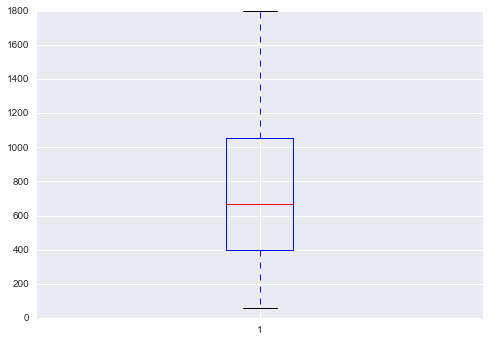

In [52]:
plt.boxplot(divvy[(divvy['tripduration'] <= 1800.0)]['tripduration'])

(array([  13044.,   15049.,   25822.,   37343.,   49667.,   67006.,
          76123.,   93060.,   97456.,  105284.,  118877.,  118166.,
         130365.,  125873.,  127730.,  135669.,  129926.,  136540.,
         128147.,  127271.,  133963.,  125199.,  130722.,  122180.,
         120388.,  125586.,  115859.,  120413.,  111503.,  109629.,
         113356.,  104342.,  108486.,   99805.,   97779.,  101538.,
          93661.,   96684.,   89465.,   87536.,   90553.,   83489.,
          86743.,   80276.,   79109.,   82147.,   75975.,   78639.,
          73350.,   71844.,   75019.,   68821.,   71854.,   66347.,
          65063.,   67860.,   62754.,   65043.,   60607.,   59475.,
          62269.,   57813.,   59945.,   55568.,   55182.,   56438.,
          52525.,   54895.,   50765.,   50007.,   52298.,   48735.,
          50107.,   46550.,   45585.,   47460.,   43691.,   45364.,
          41547.,   40744.,   42132.,   38598.,   40008.,   36556.,
          35848.,   36040.,   33133.,   34042., 

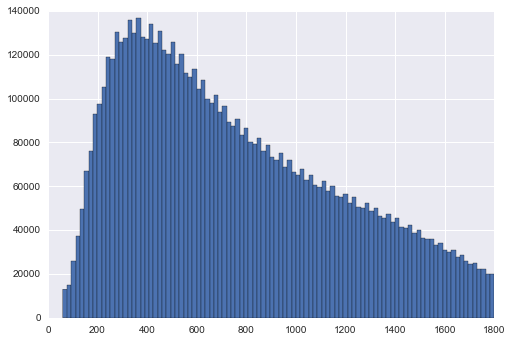

In [56]:
plt.hist(divvy[(divvy['tripduration'] <= 1800.0)]['tripduration'], bins = 100)

(array([  34085.,   81954.,  153736.,  210674.,  252834.,  287707.,
         293058.,  303986.,  292518.,  287026.,  286267.,  268783.,
         263224.,  245369.,  232641.,  227524.,  210448.,  205127.,
         190336.,  182281.,  179075.,  167237.,  164412.,  153359.,
         147102.,  144226.,  135751.,  133903.,  125196.,  120185.,
         118477.,  111725.,  109036.,  102051.,   96487.,   93618.,
          86455.,   82224.,   74403.,   69141.,   65220.,   58243.,
          53126.,   45889.,   41124.,   37198.,   32000.,   29602.,
          26157.,   23535.,   22238.,   19820.,   19061.,   17238.,
          15928.,   15334.,   13923.,   13353.,   12248.,   11662.,
          11291.,   10376.,   10158.,    9401.,    8930.,    8940.,
           8256.,    8102.,    7438.,    7366.,    7158.,    6781.,
           6822.,    6293.,    6039.,    6173.,    5762.,    5601.,
           5327.,    5092.,    5132.,    4886.,    4875.,    4559.,
           4390.,    4279.,    4032.,    3995., 

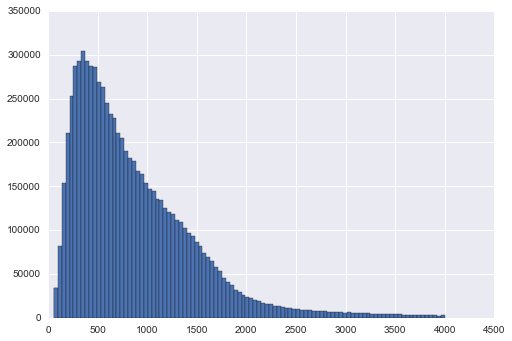

In [57]:
plt.hist(divvy[(divvy['tripduration'] <= 4000.0)]['tripduration'], bins = 100)

In [48]:
divvy['tripduration'].value_counts().sort_values(ascending=False)

346      7776
328      7775
366      7744
341      7731
342      7720
352      7703
354      7679
360      7672
380      7670
344      7667
339      7666
363      7657
329      7652
356      7650
345      7648
318      7647
348      7646
349      7645
340      7642
357      7637
364      7634
365      7633
314      7631
331      7628
389      7624
361      7619
355      7618
327      7614
369      7613
336      7610
         ... 
15350       1
31742       1
16458       1
84955       1
12356       1
32137       1
28043       1
73839       1
23521       1
31714       1
27617       1
20546       1
82031       1
77921       1
61529       1
16463       1
53220       1
73126       1
16450       1
16379       1
24567       1
31716       1
15342       1
60404       1
20551       1
16453       1
24641       1
32860       1
68555       1
21400       1
Name: tripduration, dtype: int64

(array([ 19187.,  18129.,  17126.,  16160.,  15208.,  14439.,  13671.,
         13278.,  12680.,  11981.,  11539.,  10802.,  10574.,  10215.,
          9673.,   9301.,   8994.,   8788.,   8508.,   8229.,   7961.,
          7494.,   7402.,   7231.,   6961.,   6724.,   6552.,   6285.,
          6122.,   5935.,   5892.,   5643.,   5372.,   5395.,   5332.,
          5046.,   4992.,   4829.,   4718.,   4620.,   4525.,   4388.,
          4368.,   4240.,   4109.,   4119.,   3924.,   3960.,   3881.,
          3763.,   3674.,   3640.,   3433.,   3469.,   3360.,   3423.,
          3344.,   3210.,   3187.,   3112.,   3143.,   3062.,   3074.,
          3031.,   2823.,   2806.,   2768.,   2755.,   2788.,   2769.,
          2570.,   2697.,   2560.,   2471.,   2486.,   2436.,   2392.,
          2374.,   2368.,   2290.,   2221.,   2297.,   2250.,   2184.,
          2168.,   2147.,   2078.,   1961.,   2069.,   2008.,   1903.,
          1922.,   1844.,   1805.,   1768.,   1862.,   1766.,   1755.,
      

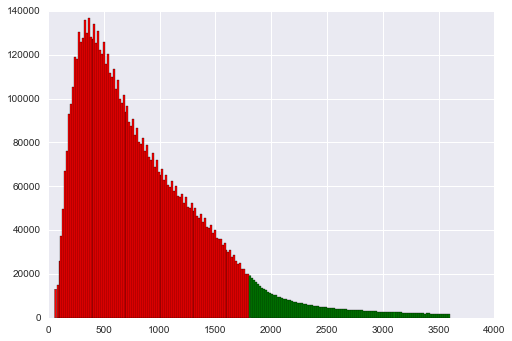

In [60]:
plt.hist(divvy[(divvy['tripduration'] <= 1800.0)]['tripduration'], bins = 100, color='r')
plt.hist(divvy[(divvy['tripduration'] > 1800.0) & (divvy['tripduration'] <= 3600.0)]['tripduration'], bins = 100, color='g')

In [61]:
under30 = divvy[(divvy['tripduration'] <= 1800.0)]['tripduration']
over30 = divvy[(divvy['tripduration'] > 1800.0) & (divvy['tripduration'] <= 3600.0)]['tripduration']

(array([ 49653.,  43366.,  37767.,  33191.,  29324.,  26220.,  23986.,
         21632.,  19993.,  18270.,  16715.,  15447.,  14549.,  13463.,
         12582.,  11942.,  11214.,  10739.,  10006.,   9431.,   9239.,
          8704.,   8490.,   7831.,   7670.,   7390.,   6968.,   6679.,
          6447.,   6252.,   6006.,   5631.,   5454.,   5093.,   4999.,
          4530.,     77.]),
 array([1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300,
        2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850,
        2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400,
        3450, 3500, 3550, 3600, 3650]),
 <a list of 37 Patch objects>)

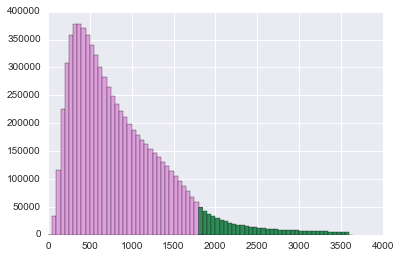

In [71]:
plt.hist(under30, bins=range(0,1900,50), color='plum')
plt.hist(over30, bins=range(1800,3700,50), color='seagreen')

In [72]:
divvy['usertype'].value_counts()

Subscriber    5466758
Customer      2400700
Dependent         143
Name: usertype, dtype: int64

In [76]:
no_dependents = divvy.copy()
print no_dependents.count()
no_dependents = no_dependents[(no_dependents['usertype'] != 'Dependents')]
print no_dependents.count()

bikeid               7867601
birthday              402909
birthyear            5063917
from_station_id      7867601
from_station_name    7867601
gender               5466633
starttime            7867601
stoptime             7867601
to_station_id        7867601
to_station_name      7867601
trip_id              7867601
tripduration         7867601
usertype             7867601
dtype: int64
bikeid               7867601
birthday              402909
birthyear            5063917
from_station_id      7867601
from_station_name    7867601
gender               5466633
starttime            7867601
stoptime             7867601
to_station_id        7867601
to_station_name      7867601
trip_id              7867601
tripduration         7867601
usertype             7867601
dtype: int64


In [77]:
no_dependents['usertype'].value_counts()

Subscriber    5466758
Customer      2400700
Dependent         143
Name: usertype, dtype: int64

In [78]:
import math
no_dependents['minutes'] = no_dependents['tripduration'].apply(lambda x: math.floor(x /60.0))

In [79]:
no_dependents['minutes'].describe()

count    7.867601e+06
mean     1.676336e+01
std      3.438477e+01
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      2.000000e+01
max      1.439000e+03
Name: minutes, dtype: float64

In [80]:
no_dependents['minutes'].head()

0     5.0
1     1.0
2     7.0
3     2.0
4    14.0
Name: minutes, dtype: float64

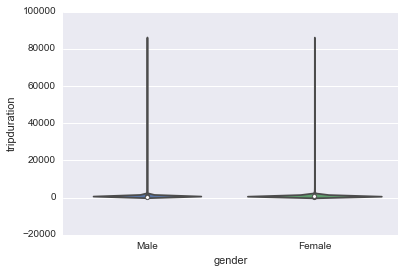

In [81]:
sns.violinplot(x="gender", y="tripduration", data=divvy)
plt.show()

In [82]:
sns.violinplot(x="usertype", y="tripduration", data=under30)
plt.show()

ValueError: Could not interpret input 'usertype'

In [83]:
usertypes = pd.get_dummies(no_dependents['usertype'])
usertypes.head()

,Customer,Dependent,Subscriber
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [84]:
no_dependents = no_dependents.join(usertypes)
no_dependents.head()

,bikeid,birthday,birthyear,from_station_id,from_station_name,gender,starttime,stoptime,to_station_id,to_station_name,trip_id,tripduration,usertype,minutes,Customer,Dependent,Subscriber
0,480,NaN,NaN,85,Michigan Ave & Oak St,NaN,2013-06-27 12:11,2013-06-27 12:16,28,Larrabee St & Menomonee St,4118,316,Customer,5.0,1.0,0.0,0.0
1,77,NaN,NaN,32,Racine Ave & Congress Pkwy,NaN,2013-06-27 14:44,2013-06-27 14:45,32,Racine Ave & Congress Pkwy,4275,64,Customer,1.0,1.0,0.0,0.0
2,77,NaN,NaN,32,Racine Ave & Congress Pkwy,NaN,2013-06-27 14:58,2013-06-27 15:05,19,Loomis St & Taylor St,4291,433,Customer,7.0,1.0,0.0,0.0
3,77,NaN,NaN,19,Loomis St & Taylor St,NaN,2013-06-27 15:06,2013-06-27 15:09,19,Loomis St & Taylor St,4316,123,Customer,2.0,1.0,0.0,0.0
4,77,NaN,NaN,19,Loomis St & Taylor St,NaN,2013-06-27 15:13,2013-06-27 15:27,55,Halsted St & James M Rochford St,4342,852,Customer,14.0,1.0,0.0,0.0


In [87]:
no_dependents.groupby('minutes')['Customer'].sum() ## exactly the same output as a pivot table

minutes
1.0       11774.0
2.0       12694.0
3.0       18447.0
4.0       26803.0
5.0       34227.0
6.0       42052.0
7.0       49372.0
8.0       55955.0
9.0       61414.0
10.0      65174.0
11.0      69195.0
12.0      71453.0
13.0      74183.0
14.0      76212.0
15.0      78379.0
16.0      80074.0
17.0      81286.0
18.0      82635.0
19.0      83696.0
20.0      82701.0
21.0      83495.0
22.0      82488.0
23.0      80318.0
24.0      78146.0
25.0      73964.0
26.0      69233.0
27.0      64424.0
28.0      58353.0
29.0      50364.0
30.0      43830.0
           ...   
1410.0        4.0
1411.0        5.0
1412.0        2.0
1413.0        5.0
1414.0        3.0
1415.0        7.0
1416.0       11.0
1417.0        4.0
1418.0        5.0
1419.0        3.0
1420.0       14.0
1421.0        6.0
1422.0       14.0
1423.0        8.0
1424.0        9.0
1425.0        7.0
1426.0        3.0
1427.0        4.0
1428.0        2.0
1429.0        7.0
1430.0        8.0
1431.0        5.0
1432.0        1.0
1433.0        6.0
14

In [88]:
customers_by_minutes = no_dependents.groupby('minutes')['Customer'].sum() 
subscribers_by_minutes = no_dependents.groupby('minutes')['Subscriber'].sum() 

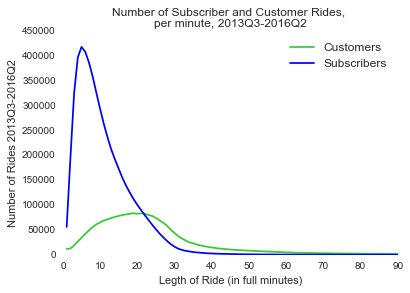

In [101]:
plt.axes(axisbg='w')
plt.plot(customers_by_minutes, color='limegreen', label='Customers')
plt.plot(subscribers_by_minutes, color='b', label='Subscribers')
plt.xlim(0, 90)
plt.ylabel("Number of Rides 2013Q3-2016Q2")
plt.xlabel("Legth of Ride (in full minutes)")
plt.title("Number of Subscriber and Customer Rides, \nper minute, 2013Q3-2016Q2")
plt.legend(loc='upper right', shadow=True, fontsize='large')


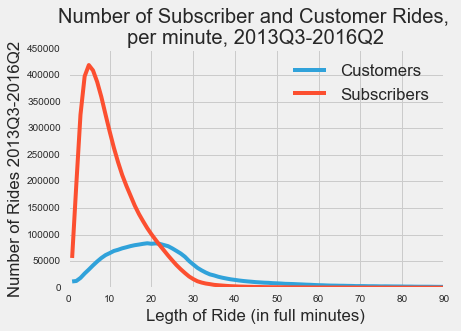

In [104]:
plt.style.use('fivethirtyeight')
plt.plot(customers_by_minutes, label='Customers')
plt.plot(subscribers_by_minutes, label='Subscribers')
plt.xlim(0, 90)
plt.ylabel("Number of Rides 2013Q3-2016Q2")
plt.xlabel("Legth of Ride (in full minutes)")
plt.title("Number of Subscriber and Customer Rides, \nper minute, 2013Q3-2016Q2")
plt.legend(loc='upper right', shadow=True, fontsize='large')



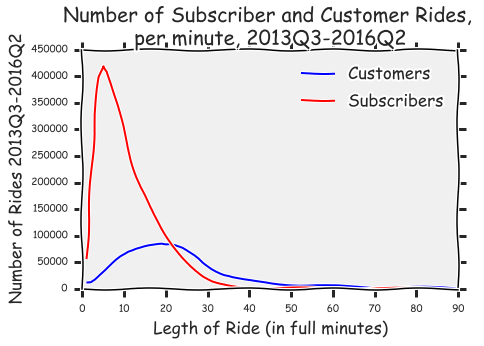

In [105]:
plt.xkcd()
plt.plot(customers_by_minutes, label='Customers')
plt.plot(subscribers_by_minutes, label='Subscribers')
plt.xlim(0, 90)
plt.ylabel("Number of Rides 2013Q3-2016Q2")
plt.xlabel("Legth of Ride (in full minutes)")
plt.title("Number of Subscriber and Customer Rides, \nper minute, 2013Q3-2016Q2")
plt.legend(loc='upper right', shadow=True, fontsize='large')